# Demo: OpenMX and  DeepMD-kit

Today, I will try to demonstrate how to make a NN potential by using interface from OpenMX to DeePMD-kit.

Regardless of which DFT software is used, the information shown below must be transmitted to the DeePMD-kit side.

<div style="text-align: center;">【Available properties are (nframe: number of frames in the system, natoms: total number of atoms in the system)】</div>

| key          | type        | dimension            | are labels | description                           |
|--------------|-------------|----------------------|------------|---------------------------------------|
| 'atom_names' | list of str | ntypes               | False      | The name of each atom type            |
| 'atom_numbs' | list of int | ntypes               | False      | The number of atoms of each atom type |
| 'atom_types' | np.ndarray  | natoms               | False      | Array assigning type to each atom     |
| 'cells'      | np.ndarray  | nframes x 3 x 3      | False      | The cell tensor of each frame         |
| 'coords'     | np.ndarray  | nframes x natoms x 3 | False      | The atom coordinates                  |
| 'energies'   | np.ndarray  | nframes              | True       | The frame energies                    |
| 'forces'     | np.ndarray  | nframes x natoms x 3 | True       | The atom forces                       |
| 'virials'    | np.ndarray  | nframes x 3 x 3      | True       | The virial tensor of each frame       |

For more details, please check [dpdata repository](https://github.com/deepmodeling/dpdata/tree/master).

Let's check file behaviors.

```
cd dpdata/openmx
python3 omx.py
```

The information on the table is read correctly.

## How to use (for busy people)

Original `dpdata` doesn't supports OpenMX format at this time (2023/11/28). However, I make it possible. Please run the following command.

In [1]:
import dpdata
data = dpdata.LabeledSystem(f'10.data/Methane', fmt = 'openmx')
print('# the data contains %d frames' % len(data))

NotImplementedError: Unsupported data format openmx. Supported formats: amber/md sqm/out sqm/in siesta/output siesta/aimd_output ase/structure fhi_aims/output fhi_aims/md fhi_aims/scf list xyz quip/gap/xyz_file quip/gap/xyz pymatgen/structure pymatgen/molecule pymatgen/computedstructureentry psi4/out deepmd/raw deepmd deepmd/comp deepmd/npy deepmd/npy/mixed deepmd/hdf5 dftbplus gromacs/gro gro 3dmol cp2k/aimd_output cp2k/output stru abacus/stru abacus/lcao/scf abacus/pw/scf abacus/scf abacus/lcao/md abacus/pw/md abacus/md abacus/lcao/relax abacus/pw/relax abacus/relax pwmat/output pwmat/mlmd pwmat/movement mlmd movement pwmat/final.config pwmat/atom.config final.config atom.config mol_file mol sdf_file sdf vasp/contcar vasp/poscar contcar poscar vasp/string vasp/outcar outcar vasp/xml xml gaussian/log gaussian/md gaussian/gjf lammps/lmp lmp lammps/dump dump qe/cp/traj qe/pw/scf

In [2]:
! cp -r openmx dpdata/
! cp openmx.py dpdata/plugins/

In [1]:
import dpdata
data = dpdata.LabeledSystem(f'10.data/Methane', fmt = 'openmx')
print('# the data contains %d frames' % len(data))

# the data contains 200 frames


#### Note: You might need to reboot the kernel.

## Sample files description

1. `00.data` CH4 with ABACUS (, CP2K, or VASP)
2. `10.data` CH4 with OpenMX

Each folder named `train` contains `input.json`, deepmd-kit input script.

1. `01.train` CH4 with ABACUS (, CP2K, or VASP)
1. `11.train` CH4 with OpenMX

For example, `01.train` corresponds to `00.data`.

The __package__ named `dpdata` supports `fmt="openmx"`.

Each file name means the following.

1. "abacus" is ABACUS results
2. "openmx" is OpenMX results
3. "abacus_nn" is NN potential results made with ABACUS
4. "openmx_nn" is NN potential results made with OpenMX

Please check each folder.

1. `gif` contains DPMD animation
1. `img` contains image of each system
1. `log` contains logs of DPMD calculation, like temperature, P.E., etc.
2. `traj` contains trajectories of DPMD calculation

You can run MD calculation with ASE by using `CH4_MD.py`.

## How to prepare for OpenMX format (minimum required)

To prepare minimum required, place the original `dpdata` on the working directory, and place a file named `openmx.py` and a folder named `openmx`, which contains `__init__.py` and `omx.py`, in the _appropriate location_.

Please download [openmx.py](https://github.com/shigeandtomo/Demo/blob/main/openmx.py) and the folder named [openmx](https://github.com/shigeandtomo/Demo/tree/main/openmx).

Note: The easiest way to prepare is probably to use the Finder or something similar managers to get the folder arrangement just right anyway. 

Anyway, the interface works if the directory arrangement shown below is completed.

In [15]:
! tree dpdata/openmx

dpdata/openmx
├── __init__.py
├── __pycache__
│   ├── __init__.cpython-311.pyc
│   └── omx.cpython-311.pyc
└── omx.py

2 directories, 4 files


```
openmx
├── __init__.py
├── __pycache__
│   ├── __init__.cpython-311.pyc
│   └── omx.cpython-311.pyc
└── omx.py

2 directories, 4 files

```
is correct.

In [16]:
! tree dpdata/plugins

dpdata/plugins
├── 3dmol.py
├── __init__.py
├── __pycache__
│   ├── 3dmol.cpython-311.pyc
│   ├── __init__.cpython-311.pyc
│   ├── abacus.cpython-311.pyc
│   ├── amber.cpython-311.pyc
│   ├── ase.cpython-311.pyc
│   ├── cp2k.cpython-311.pyc
│   ├── deepmd.cpython-311.pyc
│   ├── dftbplus.cpython-311.pyc
│   ├── fhi_aims.cpython-311.pyc
│   ├── gaussian.cpython-311.pyc
│   ├── gromacs.cpython-311.pyc
│   ├── lammps.cpython-311.pyc
│   ├── list.cpython-311.pyc
│   ├── openmx.cpython-311.pyc
│   ├── psi4.cpython-311.pyc
│   ├── pwmat.cpython-311.pyc
│   ├── pymatgen.cpython-311.pyc
│   ├── qe.cpython-311.pyc
│   ├── rdkit.cpython-311.pyc
│   ├── siesta.cpython-311.pyc
│   ├── vasp.cpython-311.pyc
│   └── xyz.cpython-311.pyc
├── abacus.py
├── amber.py
├── ase.py
├── cp2k.py
├── deepmd.py
├── dftbplus.py
├── fhi_aims.py
├── gaussian.py
├── gromacs.py
├── lammps.py
├── list.py
├── openmx.py
├── psi4.py
├── pwmat.py
├── pymatgen.py
├── qe.py
├── rdkit.py
├── siesta.py
├── vasp.py
└── xyz.py



```
plugins
├── 3dmol.py
├── __init__.py
├── __pycache__
│   ├── 3dmol.cpython-311.pyc
│   ├── __init__.cpython-311.pyc
│   ├── abacus.cpython-311.pyc
│   ├── amber.cpython-311.pyc
│   ├── ase.cpython-311.pyc
│   ├── cp2k.cpython-311.pyc
│   ├── deepmd.cpython-311.pyc
│   ├── dftbplus.cpython-311.pyc
│   ├── fhi_aims.cpython-311.pyc
│   ├── gaussian.cpython-311.pyc
│   ├── gromacs.cpython-311.pyc
│   ├── lammps.cpython-311.pyc
│   ├── list.cpython-311.pyc
│   ├── openmx.cpython-311.pyc
│   ├── psi4.cpython-311.pyc
│   ├── pwmat.cpython-311.pyc
│   ├── pymatgen.cpython-311.pyc
│   ├── qe.cpython-311.pyc
│   ├── rdkit.cpython-311.pyc
│   ├── siesta.cpython-311.pyc
│   ├── vasp.cpython-311.pyc
│   └── xyz.cpython-311.pyc
├── abacus.py
├── amber.py
├── ase.py
├── cp2k.py
├── deepmd.py
├── dftbplus.py
├── fhi_aims.py
├── gaussian.py
├── gromacs.py
├── lammps.py
├── list.py
├── openmx.py
├── psi4.py
├── pwmat.py
├── pymatgen.py
├── qe.py
├── rdkit.py
├── siesta.py
├── vasp.py
└── xyz.py

2 directories, 44 files
```
is correct.

## How to prepare for OpenMX format (from command line)

Assuming that "tensorflow" and "deepmd-kit" is pre-installed. 

In [ ]:
# ! pip install tensorflow
# ! pip install deepmd-kit

Please download sample files.

In [1]:
# ! git clone https://github.com/shigeandtomo/Demo work

Cloning into 'Demo'...
remote: Enumerating objects: 571, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 571 (delta 5), reused 13 (delta 3), pack-reused 556
Receiving objects: 100% (571/571), 549.46 MiB | 15.74 MiB/s, done.
Resolving deltas: 100% (88/88), done.
Updating files: 100% (353/353), done.


In [7]:
! ls

00.data               Cdia_MD.py            demo.ipynb
01.train              Cdia_curve.png        demo_additional.ipynb
10.data               Graphite.gif          dpdata
11.train              Graphite.traj         file.sh
20.data               Graphite_MD.py        geometry
21.train              Graphite_curve.png    geometry.py
30.data               H2O.gif               gif
31.train              H2O.log               img
40.data               H2O.traj              log
41.train              H2O.txt               omx2qe.py
CH4.gif               H2O_MD.py             omxfile.sh
CH4.traj              H2O_nn.txt            openmx.txt
CH4.txt               Methane.txt           openmx_nn.txt
CH4_MD.py             README.md             train.sh
Cdia.gif              __pycache__           traj
Cdia.png              abacus.txt
Cdia.traj             abacus_nn.txt


In [3]:
# import os
# os.chdir("work")

#### Please download original dpdata.

In [3]:
# ! git clone https://github.com/deepmodeling/dpdata tmp

Place the original `dpdata` on the working directory, and place a file named `openmx.py` and a folder named `openmx`, which contains `__init__.py` and `omx.py`, in the _appropriate location_.

In [ ]:
# ! cp -r tmp/dpdata .

In [2]:
# ! cp -r openmx dpdata/
# ! cp openmx.py dpdata/plugins/

cp: openmx: No such file or directory
cp: openmx.py: No such file or directory


## Import libraries

Now, we can use deepmd with OpenMX. Then, import the following libraries.

In [2]:
import os
import dpdata ### dpdata in the current directory is read
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ang2bohr = 1.88972612463
bohr2ang = 0.529177210903

### Note: Even if `dpdata` has already been installed, the package named "dpdata" in the current directory is imported first.

## Table of contents

The demonstration with ABACUS from [DeePMD-kit Quick Start Tutorial](https://docs.deepmodeling.com/projects/deepmd/en/master/getting-started/quick_start.html)
1. [Get DFT data](#scrollTo=zEltPNkLuLz6) 
2. [Data preparation](#scrollTo=G-laa4YqQRji)
3. [Prepare input script](#scrollTo=G-laa4YqQRji)
4. [Train a model](#scrollTo=G-laa4YqQRji)
5. [Test a model](#scrollTo=G-laa4YqQRji)
6. [Run MD with ASE](#scrollTo=G-laa4YqQRji)

The demonstration with OpenMX
1. [Get DFT data](#scrollTo=zEltPNkLuLz6) 
2. [Data preparation](#scrollTo=G-laa4YqQRji)
3. [Prepare input script](#scrollTo=G-laa4YqQRji)
4. [Train a model](#scrollTo=G-laa4YqQRji)
5. [Test a model](#scrollTo=G-laa4YqQRji)
6. [Run MD with ASE](#scrollTo=G-laa4YqQRji)
7. [Run structure optimization with ASE]()

【Known problems】

【Linkage to tools】

## The demonstration with ABACUS from [DeePMD-kit Quick Start Tutorial](https://docs.deepmodeling.com/projects/deepmd/en/master/getting-started/quick_start.html)

You can see the official tutorial from the URL. I will explain ABACUS format in brief.

### 1.Get DFT data

#### First, plot bond length and angles in the data from ABACUS.

length mean value = 1.10, angle mean value = 109.79


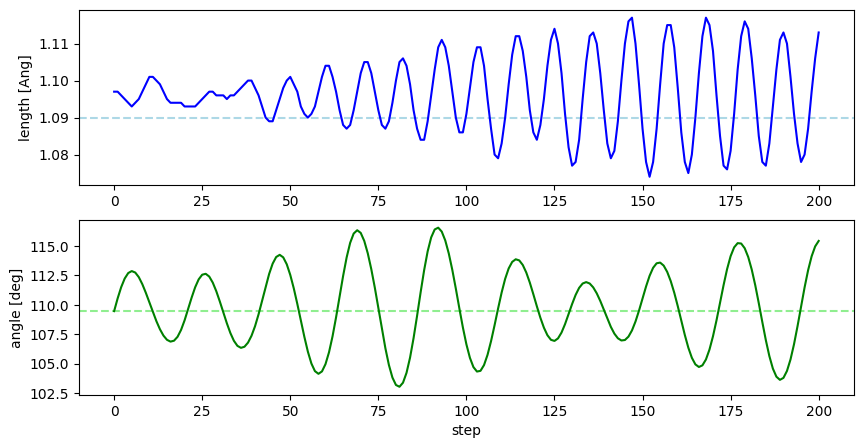

In [ ]:
### ABACUS data plot ###
data=np.genfromtxt("abacus.txt")

fig=plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(2, 1, 1)
# plt.xlim(1000,2000)
ax1.set_ylabel('length [Ang]')  # y axis label
ax1.axhline(1.09,color="lightblue",linestyle="--")
ax1.plot(data[:,0], data[:,1], color="blue")

ax2 = fig.add_subplot(2, 1, 2)
# plt.xlim(1000,2000)
ax2.set_xlabel("step")
ax2.set_ylabel('angle [deg]')  # y axis label
ax2.axhline(109.5,color="lightgreen",linestyle="--")
ax2.plot(data[:,0], data[:,4], color="green")

print(f"length mean value = {data[:,1].mean():1.2f}, angle mean value = {data[:,4].mean():3.2f}")
# plt.savefig("abacus.png")
plt.show()

### 2.Data preparation 

In [58]:
# load data of abacus/md format
data = dpdata.LabeledSystem("00.data/abacus_md", fmt="abacus/md")
print("# the data contains %d frames" % len(data))

# random choose 40 index for validation_data
index_validation = np.random.choice(201, size=40, replace=False)

# other indexes are training_data
index_training = list(set(range(201)) - set(index_validation))
data_training = data.sub_system(index_training)
data_validation = data.sub_system(index_validation)

# all training data put into directory:"training_data"
data_training.to_deepmd_npy("00.data/abacus_md/training_data")

# all validation data put into directory:"validation_data"
data_validation.to_deepmd_npy("00.data/abacus_md/validation_data")

print("# the training data contains %d frames" % len(data_training))
print("# the validation data contains %d frames" % len(data_validation))

# the data contains 201 frames
# the training data contains 161 frames
# the validation data contains 40 frames


In [60]:
data_training

Data Summary
Labeled System
-------------------
Frame Numbers      : 161
Atom Numbers       : 5
Including Virials  : Yes
Element List       :
-------------------
H  C
4  1

### 3.Prepare input script

In [5]:
! cat 01.train/input.json

{
    "_comment": " model parameters",
    "model": {
	"type_map":	["H", "C"],
	"descriptor" :{
	    "type":		"se_e2_a",
	    "sel":		"auto",
	    "rcut_smth":	0.50,
	    "rcut":		6.00,
	    "neuron":		[25, 50, 100],
	    "resnet_dt":	false,
	    "axis_neuron":	16,
	    "seed":		1,
	    "_comment":		" that's all"
	},
	"fitting_net" : {
	    "neuron":		[240, 240, 240],
	    "resnet_dt":	true,
	    "seed":		1,
	    "_comment":		" that's all"
	},
	"_comment":	" that's all"
    },

    "learning_rate" :{
	"type":		"exp",
	"decay_steps":	50,
	"start_lr":	0.001,	
	"stop_lr":	3.51e-8,
	"_comment":	"that's all"
    },

    "loss" :{
	"type":		"ener",
	"start_pref_e":	0.02,
	"limit_pref_e":	1,
	"start_pref_f":	1000,
	"limit_pref_f":	1,
	"start_pref_v":	0,
	"limit_pref_v":	0,
	"_comment":	" that's all"
    },

    "training" : {
	"training_data": {
	    "systems":     ["../00.data/abacus_md/training_data"],
	    "batch_size":  "auto",
	    "_comment":	   "that's all"
	},
	"validation_data":{
	  

### 4.Train a model

In [ ]:
! dp neighbor-stat -s 00.data/abacus_md -r 6.0 -t H C

Instructions for updating:
non-resource variables are not supported in the long term
DEEPMD INFO    training data with min nbor dist: 1.0459205686110271
DEEPMD INFO    training data with max nbor size: [4 1]
DEEPMD INFO    min_nbor_dist: 1.045921
DEEPMD INFO    max_nbor_size: [4 1]


In [13]:
! sed -i '' 's/label=1/label=0/g' train.sh
! bash train.sh

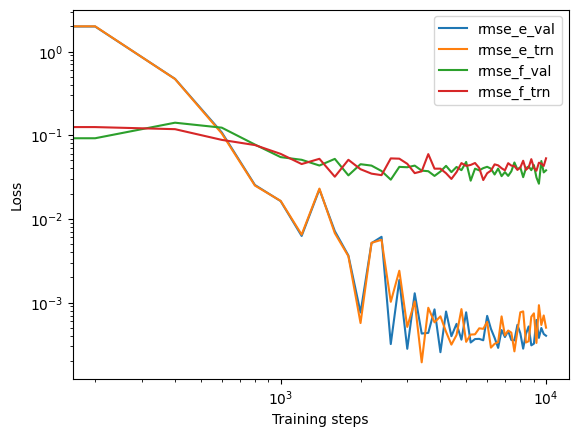

In [ ]:
with open("01.train/lcurve.out") as f:
    headers = f.readline().split()[1:]
lcurve = pd.DataFrame(np.loadtxt("01.train/lcurve.out"), columns=headers)
legends = ["rmse_e_val", "rmse_e_trn", "rmse_f_val", "rmse_f_trn"]
legends = ["rmse_e_val", "rmse_e_trn", "rmse_f_val", "rmse_f_trn"]
for legend in legends:
    plt.loglog(lcurve["step"], lcurve[legend], label=legend)
#     plt.plot(lcurve["step"], lcurve[legend], label=legend)
plt.legend()
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.show()

### 5.Test a model 

In [30]:
label=0

training_systems = dpdata.LabeledSystem(f"00.data/abacus_md/training_data", fmt="deepmd/npy")

predict = training_systems.predict(f"01.train/graph.pb")

As shown later, ABACUS data contains "virials", but OpenMX doesn't.

In [31]:
training_systems

Data Summary
Labeled System
-------------------
Frame Numbers      : 161
Atom Numbers       : 5
Including Virials  : Yes
Element List       :
-------------------
H  C
4  1

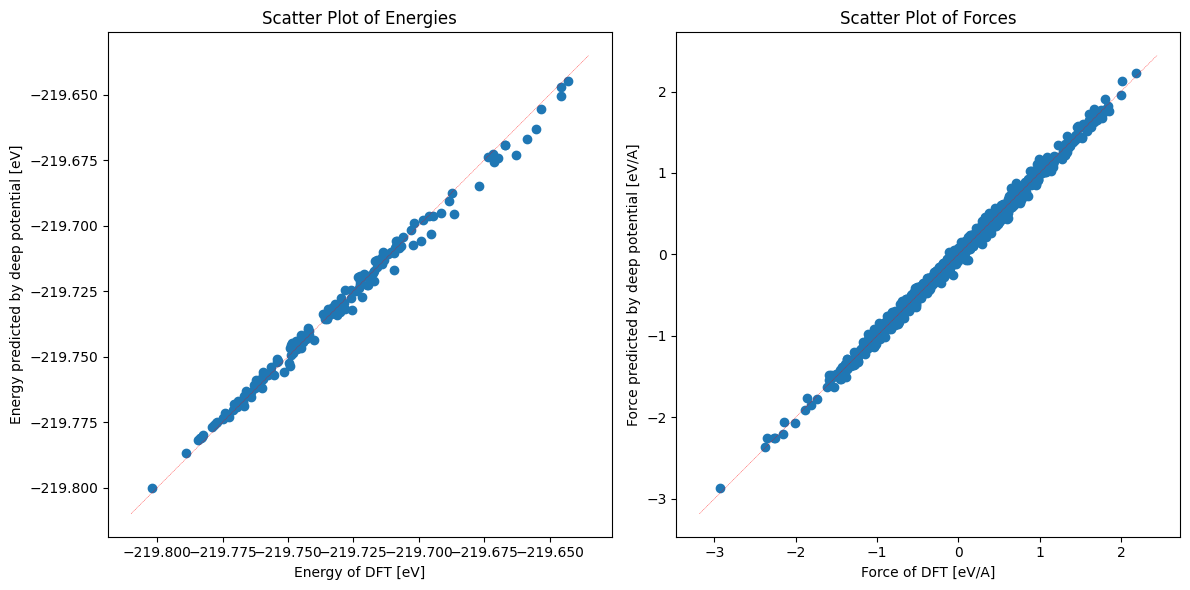

In [33]:
plt.figure(figsize=(12, 6))

# 1つ目のプロット
plt.subplot(1, 2, 1)  # 1行2列の1番目のサブプロット
plt.scatter(training_systems["energies"], predict["energies"])
x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])
plt.plot(x_range, x_range, "r--", linewidth=0.25)
plt.xlabel("Energy of DFT [eV]")
plt.ylabel("Energy predicted by deep potential [eV]")
plt.title('Scatter Plot of Energies')

# 2つ目のプロット
plt.subplot(1, 2, 2)  # 1行2列の2番目のサブプロット
plt.scatter(training_systems["forces"], predict["forces"])
x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])
plt.plot(x_range, x_range, "r--", linewidth=0.25)
plt.xlabel("Force of DFT [eV/A]")
plt.ylabel("Force predicted by deep potential [eV/A]")
plt.title('Scatter Plot of Forces')

# レイアウト調整
plt.tight_layout()

# プロットの表示
plt.show()

### 6.Run MD with ASE

Please check line 41 of `CH4_MD.py`. This line defines the potential.

In [19]:
if os.path.exists(f"log/abacus_nn.log"):
    os.remove(f"log/abacus_nn.log")

! python3 CH4_MD.py > abacus_nn.txt

Instructions for updating:
non-resource variables are not supported in the long term
2023-11-28 16:47:34.672637: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
/opt/homebrew/lib/python3.11/site-packages/ase/md/md.py:48: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


In [20]:
filename="abacus_nn"

df = pd.read_csv(
    f"log/{filename}.log",
    delim_whitespace=True,
    names=["Time[ps]", "Etot/N[eV]", "Epot/N[eV]", "Ekin/N[eV]", "T[K]"],
    skiprows=1,
    header=None,
)
df

,Time[ps],Etot/N[eV],Epot/N[eV],Ekin/N[eV],T[K]
0,0.000,-43.8980,-43.9597,0.0617,477.4
1,0.001,-43.8770,-43.9490,0.0720,557.3
2,0.002,-43.8896,-43.9302,0.0406,314.1
3,0.003,-43.8912,-43.9193,0.0280,216.9
4,0.004,-43.8860,-43.9188,0.0329,254.2
...,...,...,...,...,...
196,0.196,-43.8967,-43.9376,0.0409,316.5
197,0.197,-43.8993,-43.9419,0.0426,329.4
198,0.198,-43.9032,-43.9427,0.0395,305.4
199,0.199,-43.9035,-43.9398,0.0363,280.5


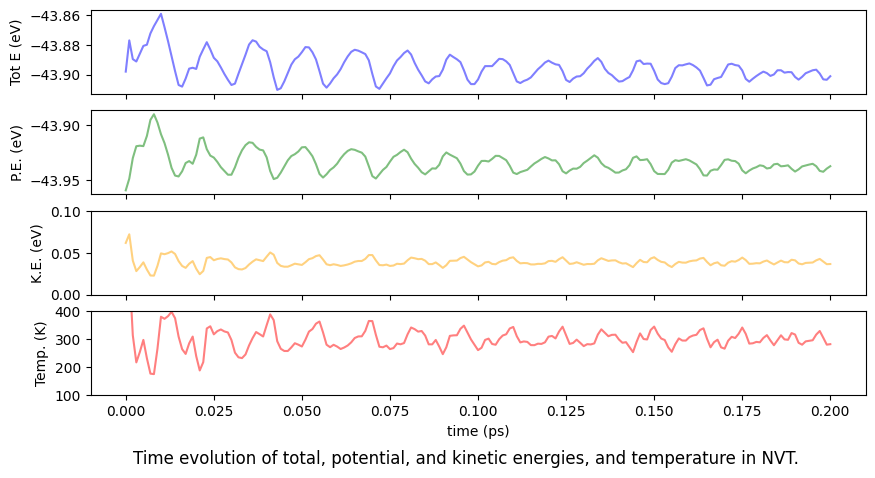

In [21]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(4, 1, 1)
ax1.set_xticklabels([])  # x axis label
ax1.set_ylabel('Tot E (eV)')  # y axis label
ax1.plot(df["Time[ps]"], df["Etot/N[eV]"], color="blue",alpha=0.5)

ax2 = fig.add_subplot(4, 1, 2)
ax2.set_xticklabels([])  # x axis label
ax2.set_ylabel('P.E. (eV)')  # y axis label
ax2.plot(df["Time[ps]"], df["Epot/N[eV]"], color="green",alpha=0.5)

ax3 = fig.add_subplot(4, 1, 3)
ax3.set_xticklabels([])  # x axis label
ax3.set_ylabel('K.E. (eV)')  # y axis label
ax3.set_ylim([0.0, 0.1])
ax3.plot(df["Time[ps]"], df["Ekin/N[eV]"], color="orange",alpha=0.5)

ax4 = fig.add_subplot(4, 1, 4)
ax4.set_xlabel('time (ps)')  # x axis label
ax4.set_ylabel('Temp. (K)')  # y axis label
ax4.plot(df["Time[ps]"], df["T[K]"], color="red",alpha=0.5)
ax4.set_ylim([100., 400])

fig.suptitle("Time evolution of total, potential, and kinetic energies, and temperature in NVT.", y=0)

plt.show()

length mean value = 1.10, angle mean value = 109.37


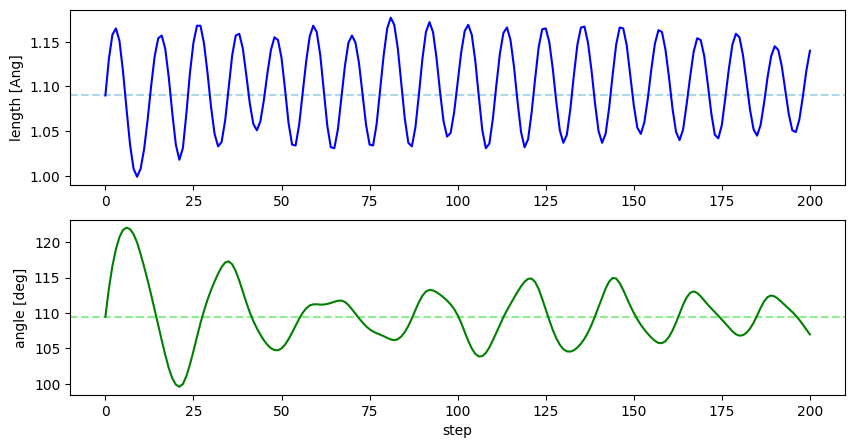

In [22]:
data=np.genfromtxt("abacus_nn.txt")

fig=plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(2, 1, 1)
# plt.xlim(200,800)
ax1.set_ylabel('length [Ang]')  # y axis label
ax1.axhline(1.09,color="lightblue",linestyle="--")
ax1.plot(data[:,0], data[:,1], color="blue")

ax2 = fig.add_subplot(2, 1, 2)
# plt.xlim(200,800)
ax2.set_xlabel("step")
ax2.set_ylabel('angle [deg]')  # y axis label
ax2.axhline(109.5,color="lightgreen",linestyle="--")
ax2.plot(data[:,0], data[:,5], color="green")

print(f"length mean value = {data[20:,1].mean():1.2f}, angle mean value = {data[20:,5].mean():3.2f}")
# plt.savefig("geometry/abacus_nn.png")
plt.show()

## The demonstration with OpenMX
Please compare learning results from ABACUS and OpenMX to verify that the DeePMD-kit is functioning properly. (OpenMX data does not contain "virials")

### 1.Get DFT data
Place the results of calculations by OpenMX in the directory named `10.data`.

Input file “CH4.dat ”:
```

#
# MD or Geometry Optimization
#

MD.Type                  NVT_NH        # Nomd|Opt|NVE|NVT_VS|NVT_NH
MD.maxIter                  200        # default=1
MD.TimeStep                 1.0        # default=0.5 (fs)
NH.Mass.HeatBath           30.0        # default = 20.0

<MD.TempControl
  2
  1    300.0
  100  300.0
MD.TempControl>
```

The time depandency of bond lengths and angles is shown below. Dot lines means literature values.

length mean value = 1.10, angle mean value = 109.43


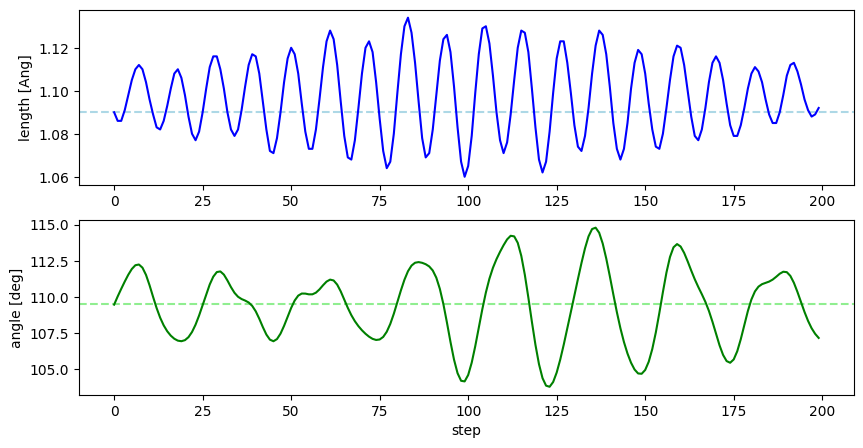

In [3]:
### OpenMX data plot ###
data=np.genfromtxt("openmx.txt")

fig=plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(2, 1, 1)
ax1.set_ylabel('length [Ang]')  # y axis label
ax1.axhline(1.09,color="lightblue",linestyle="--")
ax1.plot(data[:,0], data[:,1], color="blue")

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlabel("step")
ax2.set_ylabel('angle [deg]')  # y axis label
ax2.axhline(109.5,color="lightgreen",linestyle="--")
ax2.plot(data[:,0], data[:,5], color="green")

print(f"length mean value = {data[:,1].mean():1.2f}, angle mean value = {data[:,5].mean():3.2f}")
# plt.savefig("geometry/openmx.png")
plt.show()

### 2.Data preparation

The variable named label is the number which identifies data directories. This variable is used to distinguish data.

In [4]:
label=1

In [5]:
data = dpdata.LabeledSystem(f'{label}0.data/Methane', fmt = 'openmx')
print('# the data contains %d frames' % len(data))

# random choose 40 index for validation_data
index_validation = np.random.choice(len(data),size=40,replace=False)     

# other indexes are training_data
index_training = list(set(range(len(data)))-set(index_validation))       
data_training = data.sub_system(index_training)
data_validation = data.sub_system(index_validation)

# all training data put into directory:"training_data" 
data_training.to_deepmd_npy(f'{label}0.data/training_data')      

# all validation data put into directory:"validation_data"
data_validation.to_deepmd_npy(f'{label}0.data/validation_data')

print('# the training data contains %d frames' % len(data_training)) 
print('# the validation data contains %d frames' % len(data_validation))

# the data contains 200 frames
# the training data contains 160 frames
# the validation data contains 40 frames


In [6]:
training_systems = dpdata.LabeledSystem(f"{label}0.data/training_data", fmt="deepmd/npy")

In [9]:
training_systems # not include virials: Note that this data does not include virials.

Data Summary
Labeled System
-------------------
Frame Numbers      : 160
Atom Numbers       : 5
Including Virials  : No
Element List       :
-------------------
C  H
1  4

### 3.Prepare input script

Input file “input.json ”:
```
"model": {
        "type_map":	["H", "C"],
        "descriptor" :{
            "type":		"se_e2_a",
            "sel":		"auto",
            "rcut_smth":	0.50,
            "rcut":		6.00,
            "neuron":		[25, 50, 100],
            "resnet_dt":	false,
            "axis_neuron":	16,
            "seed":		1,
            "_comment":		" that's all"
        },
        "fitting_net" : {
            "neuron":		[240, 240, 240],
            "resnet_dt":	true,
            "seed":		1,
            "_comment":		" that's all"
        },
```

In [10]:
! cat 11.train/input.json # the same file with the case of ABACUS

{
      "_comment": " model parameters",
      "model": {
        "type_map":	["H", "C"],
        "descriptor" :{
            "type":		"se_e2_a",
            "sel":		"auto",
            "rcut_smth":	0.50,
            "rcut":		6.00,
            "neuron":		[25, 50, 100],
            "resnet_dt":	false,
            "axis_neuron":	16,
            "seed":		1,
            "_comment":		" that's all"
        },
        "fitting_net" : {
            "neuron":		[240, 240, 240],
            "resnet_dt":	true,
            "seed":		1,
            "_comment":		" that's all"
        },
        "_comment":	" that's all"
      },
  
      "learning_rate" :{
        "type":		"exp",
        "decay_steps":	50,
        "start_lr":	0.001,	
        "stop_lr":	3.51e-8,
        "_comment":	"that's all"
      },
  
      "loss" :{
        "type":		"ener",
        "start_pref_e":	0.02,
        "limit_pref_e":	1,
        "start_pref_f":	1000,
        "limit_pref_f":	1,
        "start_pref_v":	0,
        "limit_pr

### 4.Train a model
After the training script is prepared, we can start the training with DeePMD-kit by simply running

In [11]:
! dp neighbor-stat -s 10.data -r 6.0 -t H C

Instructions for updating:
non-resource variables are not supported in the long term
DEEPMD INFO    training data with min nbor dist: 1.029958484357501
DEEPMD INFO    training data with max nbor size: [4 1]
DEEPMD INFO    min_nbor_dist: 1.029958
DEEPMD INFO    max_nbor_size: [4 1]


In [12]:
### Execute the deepmd-kit commands in sequence.　###
! sed -i '' 's/label=0/label=1/g' train.sh
! bash train.sh

first index = 1
Instructions for updating:
non-resource variables are not supported in the long term
DEEPMD INFO    Calculate neighbor statistics... (add --skip-neighbor-stat to skip this step)
DEEPMD INFO    training data with min nbor dist: 1.029958484357501
DEEPMD INFO    training data with max nbor size: [4 1]
DEEPMD INFO     _____               _____   __  __  _____           _     _  _   
DEEPMD INFO    |  __ \             |  __ \ |  \/  ||  __ \         | |   (_)| |  
DEEPMD INFO    | |  | |  ___   ___ | |__) || \  / || |  | | ______ | | __ _ | |_ 
DEEPMD INFO    | |  | | / _ \ / _ \|  ___/ | |\/| || |  | ||______|| |/ /| || __|
DEEPMD INFO    | |__| ||  __/|  __/| |     | |  | || |__| |        |   < | || |_ 
DEEPMD INFO    |_____/  \___| \___||_|     |_|  |_||_____/         |_|\_\|_| \__|
DEEPMD INFO    Please read and cite:
DEEPMD INFO    Wang, Zhang, Han and E, Comput.Phys.Comm. 228, 178-184 (2018)
DEEPMD INFO    Zeng et al, arXiv:2304.09409
DEEPMD INFO    See https://deepmd.

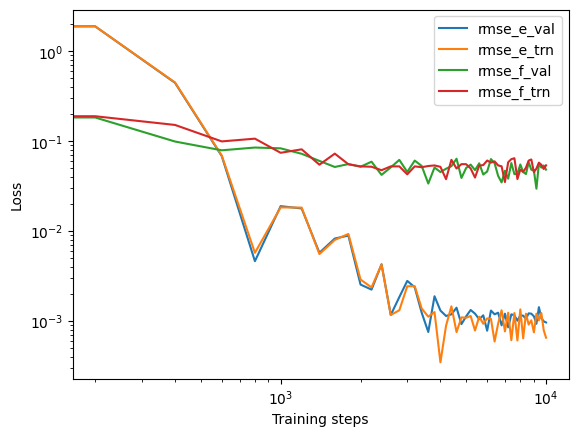

In [13]:
with open(f"{label}1.train/lcurve.out") as f:
      headers = f.readline().split()[1:]
lcurve = pd.DataFrame(np.loadtxt(f"{label}1.train/lcurve.out"), columns=headers)
legends = ["rmse_e_val", "rmse_e_trn", "rmse_f_val", "rmse_f_trn"]
for legend in legends:
      plt.loglog(lcurve["step"], lcurve[legend], label=legend)
plt.legend()
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.show()

### 5.Test a model
The terminal should display the following

```
DEEPMD INFO    # ---------------output of dp test--------------- 
DEEPMD INFO    # testing system : ../10.data/validation_data
DEEPMD INFO    # number of test data : 40 
DEEPMD INFO    Energy MAE         : 4.968513e-03 eV
DEEPMD INFO    Energy RMSE        : 5.654937e-03 eV
DEEPMD INFO    Energy MAE/Natoms  : 9.937027e-04 eV
DEEPMD INFO    Energy RMSE/Natoms : 1.130987e-03 eV
DEEPMD INFO    Force  MAE         : 3.636956e-02 eV/A
DEEPMD INFO    Force  RMSE        : 4.907324e-02 eV/A
DEEPMD INFO    Virial MAE         : 6.385603e-01 eV
DEEPMD INFO    Virial RMSE        : 7.948139e-01 eV
DEEPMD INFO    Virial MAE/Natoms  : 1.277121e-01 eV
DEEPMD INFO    Virial RMSE/Natoms : 1.589628e-01 eV
DEEPMD INFO    # ----------------------------------------------- 
```

In [14]:
label=1

training_systems = dpdata.LabeledSystem(f"{label}0.data/training_data", fmt="deepmd/npy")

predict = training_systems.predict(f"{label}1.train/graph.pb")

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-11-29 14:32:56.908206: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [15]:
training_systems

Data Summary
Labeled System
-------------------
Frame Numbers      : 160
Atom Numbers       : 5
Including Virials  : No
Element List       :
-------------------
C  H
1  4

#### The correlation between predicted data and original data can be calculated.

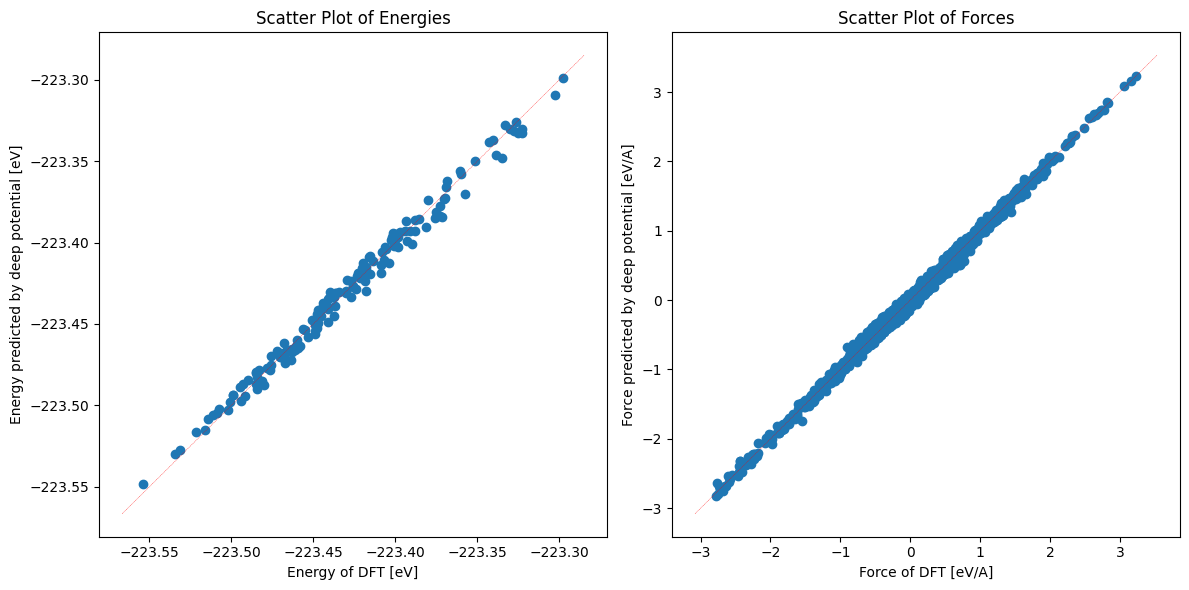

In [16]:
plt.figure(figsize=(12, 6))

# 1つ目のプロット
plt.subplot(1, 2, 1)  # 1行2列の1番目のサブプロット
plt.scatter(training_systems["energies"], predict["energies"])
x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])
plt.plot(x_range, x_range, "r--", linewidth=0.25)
plt.xlabel("Energy of DFT [eV]")
plt.ylabel("Energy predicted by deep potential [eV]")
plt.title('Scatter Plot of Energies')

# 2つ目のプロット
plt.subplot(1, 2, 2)  # 1行2列の2番目のサブプロット
plt.scatter(training_systems["forces"], predict["forces"])
x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])
plt.plot(x_range, x_range, "r--", linewidth=0.25)
plt.xlabel("Force of DFT [eV/A]")
plt.ylabel("Force predicted by deep potential [eV/A]")
plt.title('Scatter Plot of Forces')

# レイアウト調整
plt.tight_layout()

# プロットの表示
plt.show()


### 6.Run MD with ASE


In [17]:
filename="openmx_nn"

In [19]:
if os.path.exists(f"log/{filename}.log"):
    os.remove(f"log/{filename}.log")

! python3 CH4_MD.py > openmx_nn.txt

Instructions for updating:
non-resource variables are not supported in the long term
2023-11-29 14:33:46.103217: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
/opt/homebrew/lib/python3.11/site-packages/ase/md/md.py:48: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


In [20]:
df = pd.read_csv(
    f"log/{filename}.log",
    delim_whitespace=True,
    names=["Time[ps]", "Etot/N[eV]", "Epot/N[eV]", "Ekin/N[eV]", "T[K]"],
    skiprows=1,
    header=None,
)
df

,Time[ps],Etot/N[eV],Epot/N[eV],Ekin/N[eV],T[K]
0,0.000,-44.6553,-44.7097,0.0544,420.9
1,0.001,-44.6409,-44.6974,0.0565,437.2
2,0.002,-44.6500,-44.6770,0.0271,209.4
3,0.003,-44.6445,-44.6696,0.0251,194.1
4,0.004,-44.6404,-44.6726,0.0321,248.5
...,...,...,...,...,...
196,0.196,-44.6501,-44.6904,0.0403,311.9
197,0.197,-44.6521,-44.6947,0.0425,329.0
198,0.198,-44.6560,-44.6949,0.0389,300.7
199,0.199,-44.6556,-44.6899,0.0343,265.4


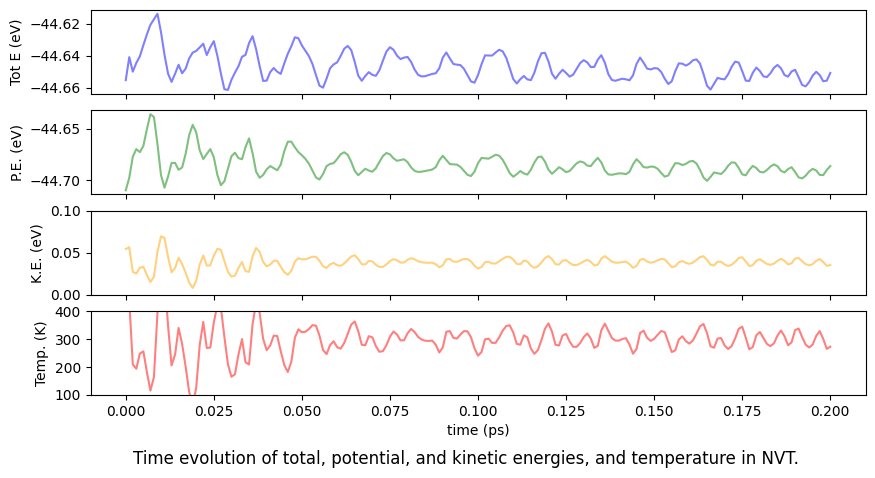

In [21]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(4, 1, 1)
ax1.set_xticklabels([])  # x axis label
ax1.set_ylabel('Tot E (eV)')  # y axis label
ax1.plot(df["Time[ps]"], df["Etot/N[eV]"], color="blue",alpha=0.5)

ax2 = fig.add_subplot(4, 1, 2)
ax2.set_xticklabels([])  # x axis label
ax2.set_ylabel('P.E. (eV)')  # y axis label
ax2.plot(df["Time[ps]"], df["Epot/N[eV]"], color="green",alpha=0.5)

ax3 = fig.add_subplot(4, 1, 3)
ax3.set_xticklabels([])  # x axis label
ax3.set_ylabel('K.E. (eV)')  # y axis label
ax3.set_ylim([0.0, 0.1])
ax3.plot(df["Time[ps]"], df["Ekin/N[eV]"], color="orange",alpha=0.5)

ax4 = fig.add_subplot(4, 1, 4)
ax4.set_xlabel('time (ps)')  # x axis label
ax4.set_ylabel('Temp. (K)')  # y axis label
ax4.plot(df["Time[ps]"], df["T[K]"], color="red",alpha=0.5)
ax4.set_ylim([100., 400])

fig.suptitle("Time evolution of total, potential, and kinetic energies, and temperature in NVT.", y=0)

plt.show()

#### Focusing on a single bond length and bond angle, we obtain the following graph.

length mean value = 1.10, angle mean value = 108.70


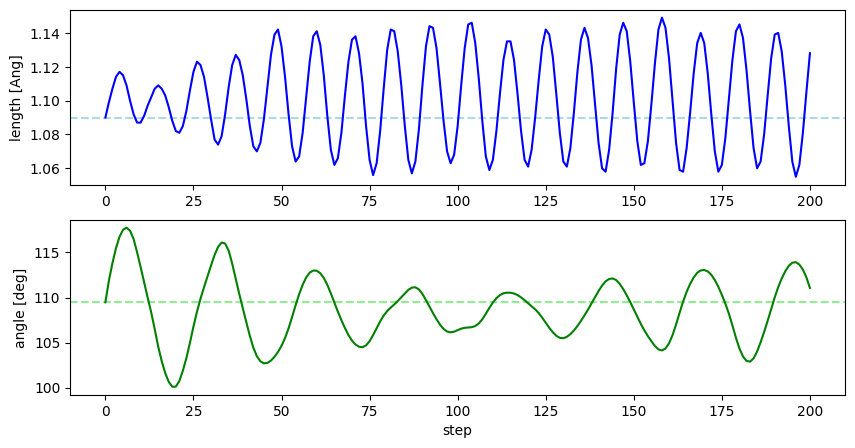

In [22]:
data=np.genfromtxt(f"{filename}.txt")

fig=plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(2, 1, 1)
# plt.xlim(200,800)
ax1.set_ylabel('length [Ang]')  # y axis label
ax1.axhline(1.09,color="lightblue",linestyle="--")
ax1.plot(data[:,0], data[:,1], color="blue")

ax2 = fig.add_subplot(2, 1, 2)
# plt.xlim(200,800)
ax2.set_xlabel("step")
ax2.set_ylabel('angle [deg]')  # y axis label
ax2.axhline(109.5,color="lightgreen",linestyle="--")
ax2.plot(data[:,0], data[:,4], color="green")

print(f"length mean value = {data[:,1].mean():1.2f}, angle mean value = {data[:,4].mean():3.2f}")
# plt.savefig(f"geometry/{filename}.png")
plt.show()

### 7.Run Structure optimization with ASE

|                  | reference | DP calculation | Error(%) |
|------------------|-----------|-------------|----------|
| bond length (Å)  | 1.09      | 1.095       |    0.46  |
| bond angle (deg) | 109.5     | 109.46      |   0.0365 |

In [81]:
# ref=1.09
# cal=1.095
# 100*np.abs(ref-cal)/ref

0.45871559633026543

      Step     Time          Energy         fmax
BFGS:    0 14:35:08     -220.687552        3.5350
length[Å] length[Å] length[Å] length[A] angle[deg] angle[deg] angle[deg]
1.407   1.407   1.407   126.870   101.537   101.537
BFGS:    1 14:35:08     -220.940909        2.4372
length[Å] length[Å] length[Å] length[A] angle[deg] angle[deg] angle[deg]
1.378   1.378   1.430   131.232   100.092   100.092
BFGS:    2 14:35:08     -221.336698        1.8769
length[Å] length[Å] length[Å] length[A] angle[deg] angle[deg] angle[deg]
1.288   1.288   1.474   144.814   94.298   94.298
BFGS:    3 14:35:08     -221.458865        2.0938
length[Å] length[Å] length[Å] length[A] angle[deg] angle[deg] angle[deg]
1.264   1.264   1.440   146.963   93.572   93.572
BFGS:    4 14:35:08     -222.088113        1.9966
length[Å] length[Å] length[Å] length[A] angle[deg] angle[deg] angle[deg]
1.181   1.181   1.252   151.710   93.035   93.035
BFGS:    5 14:35:08     -222.443895        3.0485
length[Å] length[Å] length[Å] le

/opt/homebrew/lib/python3.11/site-packages/ase/visualize/plot.py:59: UserWarning: You passed in an explicit save_count=100 which is being ignored in favor of len(frames)=16.
  animation = FuncAnimation(fig, drawimage, frames=images,


length[Å] length[Å] length[Å] length[A] angle[deg] angle[deg] angle[deg]
1.095   1.095   1.095   109.482   109.433   109.433


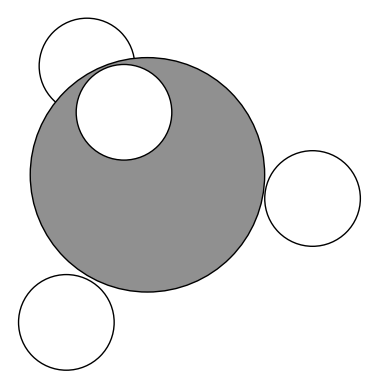

In [23]:
from ase import Atoms
from ase.optimize import BFGS
from ase.calculators.emt import EMT
from deepmd.calculator import DP
import numpy as np
from ase.md import MDLogger
from ase.io import write,Trajectory
a = 0.889981
# a = 0.30
b = 0.629312
# b = 0.20
methane = Atoms('CH4',
              positions=[(0.0, 0.0, 0.0),
                         (-a,  a,  b),
                         ( a, -a,  b),
                         ( a,  a, -b),
                         (-a, -a,  b)])
label=1
methane.set_calculator(DP(model=f"{label}1.train/graph.pb"))
dyn = BFGS(methane, trajectory="CH4.traj")

def calculate_angle(v1, v2):
    # ベクトルv1とv2の内積を計算
    dot_product = np.dot(v1, v2)
    
    # ベクトルv1とv2のノルムを計算
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    
    # アークコサインを使用して角度を計算
    angle_rad = np.arccos(dot_product / (norm_v1 * norm_v2))
    
    # ラジアンから度に変換
    angle_deg = np.degrees(angle_rad)
    
    return angle_deg

def myprint():
    vec1=methane.positions[0]-methane.positions[1]
    vec2=methane.positions[0]-methane.positions[2]
    vec3=methane.positions[0]-methane.positions[3]
    print("length[Å] length[Å] length[Å] length[A] angle[deg] angle[deg] angle[deg]")
    print(f'{np.linalg.norm(vec1):5.3f}   '+f'{np.linalg.norm(vec2):5.3f}   '+f'{np.linalg.norm(vec3):5.3f}   '+f'{calculate_angle(vec1,vec2):5.3f}   '+f'{calculate_angle(vec2,vec3):5.3f}   '+f'{calculate_angle(vec3,vec1):5.3f}')

dyn.attach(myprint, interval=1)
dyn.run(fmax=0.05)
traj=Trajectory("CH4.traj")
write(f"CH4.gif", traj[::1], rotation="30x,30y,30z")

In [79]:
vec1=methane.positions[0]-methane.positions[1]
vec2=methane.positions[0]-methane.positions[2]
vec3=methane.positions[0]-methane.positions[3]
np.array([calculate_angle(vec1,vec2),calculate_angle(vec2,vec3),calculate_angle(vec3,vec1)]).mean()

109.45881014780832

#### Based on the above results, I have determined that the interface I have created seems to be working well.

## 【Known problems】

Finally, I would like to discuss some known problems. 

### AssertionError

```
<Atoms.UnitVectors
     -3.5600000     0.0000000     3.5600000
      0.0000000     3.5600000     3.5600000
     -3.5600000     3.5600000     0.0000000
Atoms.UnitVectors>
```
has no problem, but
```
<Atoms.UnitVectors
     3.5600000     0.0000000     3.5600000
     0.0000000     3.5600000     3.5600000
     3.5600000     3.5600000     0.0000000
Atoms.UnitVectors>
```
makes a bug.

```
  File "dpdata/system.py", line 672, in rot_frame_lower_triangular
    assert np.linalg.det(rot) == 1
           ^^^^^^^^^^^^^^^^^^^^^^^
AssertionError
```

#### The cause of this error will be investigated later.

I think that this problem can occur regardless of which DFT software is used. (system.py line 659)

In [26]:
import dpdata
data = dpdata.LabeledSystem(f'30.data/Cdia', fmt = 'openmx')
print('# the data contains %d frames' % len(data))

# the data contains 1000 frames


<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
</script>
<script type="text/x-mathjax-config">
 MathJax.Hub.Config({
 tex2jax: {
 inlineMath: [['$', '$'] ],
 displayMath: [ ['$$','$$'], ["\\[","\\]"] ]
 }
 });
</script>

## 【Linkage to tools】

1. [OpenMX](https://www.openmx-square.org/)
1. [DeePMD-kit](https://github.com/deepmodeling/deepmd-kit)
1. [ASE](https://wiki.fysik.dtu.dk/ase/)        

## 【Appendix】

The virial of the system is given by

$$ \Xi=-\frac{1}{2} \sum_{i} \bm{R}_{i} \bm{F}_{i} 